In [90]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [92]:
data = pd.read_csv("C:/Users/HP/Documents/train.csv",
                  sep=',') 

In [93]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [94]:
## Data Cleaning And Preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [96]:
y = data['price_range']

In [97]:
corpus = []
for i in range(len(data)):
    combined_text = f"{data['battery_power'][i]} {data['clock_speed'][i]} {data['dual_sim'][i]} {data['four_g'][i]} {data['int_memory'][i]} {data['mobile_wt'][i]} {data['n_cores'][i]} {data['ram'][i]} {data['three_g'][i]} {data['touch_screen'][i]} {data['wifi'][i]}"
    
    # Clean text: Keep alphabets and numbers
    review = re.sub('[^0-9]', ' ', combined_text)
    review = review.lower()
    corpus.append(review)


In [98]:
corpus

['842 2 2 0 0 7 188 2 2549 0 0 1',
 '1021 0 5 1 1 53 136 3 2631 1 1 0',
 '563 0 5 1 1 41 145 5 2603 1 1 0',
 '615 2 5 0 0 10 131 6 2769 1 0 0',
 '1821 1 2 0 1 44 141 2 1411 1 1 0',
 '1859 0 5 1 0 22 164 1 1067 1 0 0',
 '1821 1 7 0 1 10 139 8 3220 1 0 1',
 '1954 0 5 1 0 24 187 4 700 1 1 1',
 '1445 0 5 0 0 53 174 7 1099 1 0 0',
 '509 0 6 1 1 9 93 5 513 1 0 0',
 '769 2 9 1 0 9 182 5 3946 0 0 0',
 '1520 2 2 0 1 33 177 8 3826 1 1 1',
 '1815 2 8 0 0 33 159 4 1482 1 0 0',
 '803 2 1 0 0 17 198 4 2680 1 0 1',
 '1866 0 5 0 1 52 185 1 373 1 0 1',
 '775 1 0 0 0 46 159 2 568 1 1 1',
 '838 0 5 0 1 13 196 8 3554 1 0 1',
 '595 0 9 1 1 23 121 3 3752 1 1 0',
 '1131 0 5 1 0 49 101 5 1835 1 1 0',
 '682 0 5 0 0 19 121 4 2337 0 1 1',
 '772 1 1 1 0 39 81 7 2819 1 1 0',
 '1709 2 1 0 0 13 156 2 3283 1 0 0',
 '1949 2 6 1 0 47 199 4 1433 0 0 1',
 '1602 2 8 1 1 38 114 3 1037 1 0 0',
 '503 1 2 1 1 8 111 3 2583 1 0 0',
 '961 1 4 1 1 57 114 8 2782 1 1 1',
 '519 1 6 1 1 51 132 4 3763 1 0 1',
 '956 0 5 0 1 41 143 7 32

In [99]:
## Output Features
y=pd.get_dummies(data['price_range'])
y=y.iloc[:,1].values

In [112]:
y

array([ True, False, False, ..., False, False, False])

In [113]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.30)

In [114]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [115]:
len(X_test),len(y_test)

(600, 600)

In [116]:
## independent features
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=2)

In [126]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[235] <= 0.5\ngini = 0.383\nsamples = 1400\nvalue = [1038, 362]'),
 Text(0.4, 0.5, 'x[446] <= 0.5\ngini = 0.382\nsamples = 1397\nvalue = [1038, 359]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.38\nsamples = 1394\nvalue = [1038, 356]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7, 0.6666666666666667, '  False')]

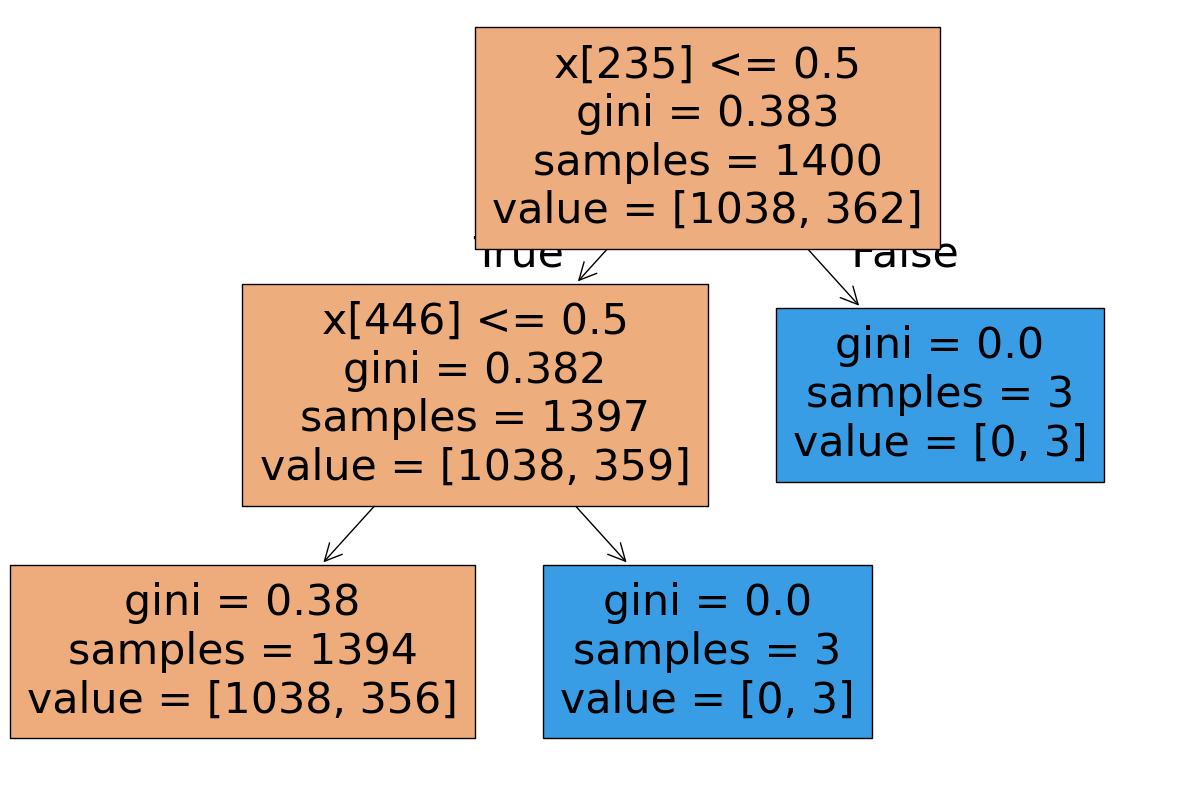

In [127]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [128]:
#prediction
y_pred=treemodel.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score,classification_report

In [130]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7733333333333333


In [131]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.77      0.87       596
        True       0.02      0.75      0.04         4

    accuracy                           0.77       600
   macro avg       0.51      0.76      0.46       600
weighted avg       0.99      0.77      0.87       600

